In [21]:
from qiskit import * # import tudo do qiskit

In [22]:
# Determina o número de qubits e de cbits a serem utilizados
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

# Constrói o circuito quântico
qc = QuantumCircuit(qr, cr)

In [23]:
# para o circuitos quânticos ficarem mais apresentáveis
%matplotlib inline 

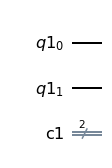

In [24]:
# desenha o circuito quântico
qc.draw(output = 'mpl')

In [25]:
# adiciona a porta lógica de Hadamard ao circuito, aplicada no qubit (registro quântico) 0
qc.h(qr[0]); # tem que usar ; pra não dar aviso

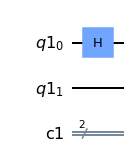

In [26]:
qc.draw(output = 'mpl') # o output = 'mpl' é para a figura ficar mais apresentável

In [27]:
# adiciona uma controll-not ao circuito, com o controle sendo qr[0] e o target sendo qr[1]
qc.cx(qr[0],qr[1]);

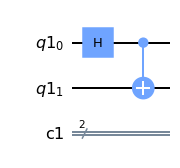

In [28]:
# é importante sempre mandar mostrar o circuito, pra ter certeza que é realmente o que queremos construir
qc.draw(output = 'mpl')

In [29]:
# adiciona medidas em todos os qubits (a ser usada quando queremos acessar a distribuições de probabilidades)
qc.measure(qr,cr);

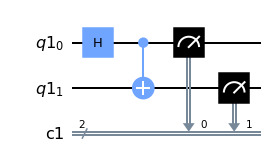

In [30]:
qc.draw(output = 'mpl')

In [31]:
# Determina o backend a ser usado, que poder ser um simulador ou um chip real
# Neste caso escolhemos o simulador qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

In [32]:
# número de medidas para estimativa de uma distribuição de probabilidades
nshots = 8192

In [34]:
# executa o circuito qc no backend escolhido
result = execute(qc, backend = simulator, shots = nshots).result()

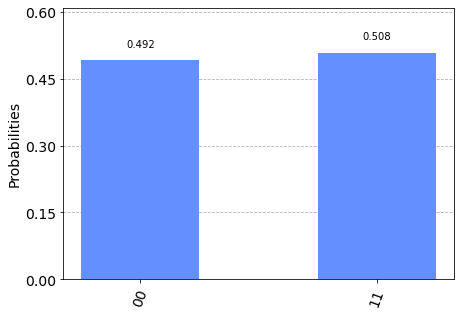

In [35]:
# para visualizar o histograma da distribuicao de probabilidades
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(qc))

In [39]:
# carrega minha conta no IBMQ (o ID foi incluido no outro arquivo, nao precisa incluir aqui)
qiskit.IBMQ.load_account();

In [40]:
#provider = IBMQ.get_provider('ibm-q')
provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')

In [41]:
# determina em qual backend vamos executar o circuito
device = provider.get_backend('ibmq_belem')

In [42]:
# se certifica que o backend esta certo
device.name()

'ibmq_belem'

In [43]:
# executa o circuito quantico qc no CQ escolhido
job = execute(qc, backend = device, shots = nshots)

In [44]:
from qiskit.tools.monitor import job_monitor

In [45]:
# para monitorar a execucao do circuito
job_monitor(job)

Job Status: job has successfully run


In [50]:
result = job.result()

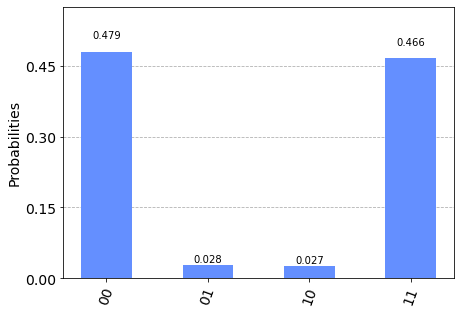

In [51]:
plot_histogram(result.get_counts(qc))